In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from IPython.display import HTML

### Books Dataset

In [146]:
# Load the dataset
livros_df = pd.read_csv('Books.csv')

display(livros_df)

C:\Users\willi\AppData\Local\Temp\ipykernel_20028\1713181223.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  livros_df = pd.read_csv('Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [147]:
# Select only the necessary columns
livros_df = livros_df[['ISBN', 'Book-Title', 'Book-Author', 'Image-URL-M']]

livros_df.head()

,ISBN,Book-Title,Book-Author,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [148]:
# Rename the column names
livros_df.columns = ['ISBN', 'Title', 'Author', 'URL_Cover']

livros_df.head()

,ISBN,Title,Author,URL_Cover
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [149]:
livros_df.shape

(271360, 4)

### Reviews dataset


In [150]:
# Load the reviews data
reviews_df = pd.read_csv('Ratings.csv')

display(reviews_df)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [151]:
#Rename the column names
reviews_df.columns = ['User', 'ISBN', 'Rating']
reviews_df.head()

,User,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [152]:
reviews_df.shape

(1149780, 3)

### Statistics of the reviews

In [153]:
reviews_df['Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Rating, dtype: float64

<AxesSubplot: ylabel='Rating'>

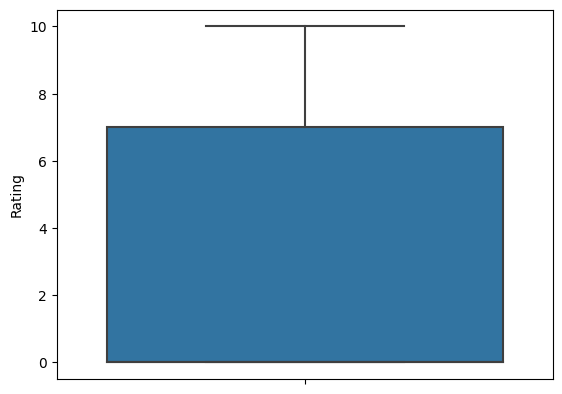

In [154]:
sns.boxplot(data=reviews_df, y=reviews_df['Rating'])

<AxesSubplot: xlabel='Rating', ylabel='Count'>

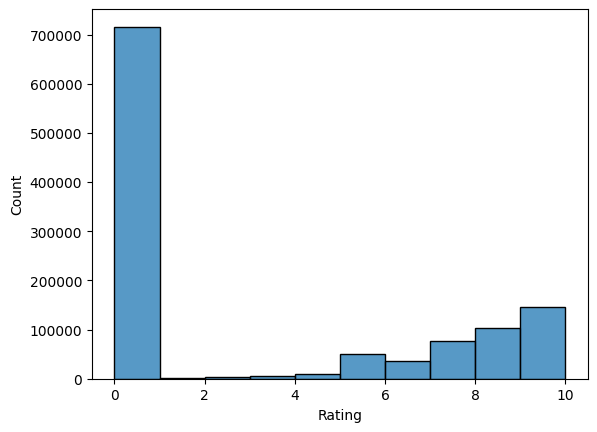

In [155]:
sns.histplot(reviews_df['Rating'], bins=10)

### Merge the Books and Reviews into a single Dataframe

In [156]:
livros_reviews_df = livros_df.merge(reviews_df, on='ISBN')

livros_reviews_df.head()

,ISBN,Title,Author,URL_Cover,User,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0


## Calculate the rating's mean for each book

In [157]:
livros_reviews_df = livros_reviews_df.groupby(['ISBN', 'Title'])['Rating'].mean().to_frame().reset_index()

# Sorting by Rating
livros_reviews_df.sort_values('Rating', ascending=False)

,ISBN,Title,Rating
231152,1575848236,To The Rescue (Move and Play),10.0
24662,0195061659,Prometheus Bound (Greek Tragedy in New Transla...,10.0
195985,0871359057,Dinosaurs: A Celebration,10.0
195986,0871359243,Dinosaurs: A Celebration,10.0
195987,0871359251,Dinosaurs: A Celebration,10.0
...,...,...,...
124693,0590319299,Cindy,0.0
124694,0590319302,That Other Girl,0.0
124695,0590319329,My Bodyguard,0.0
124696,059031954X,Dreams of Victory,0.0


<AxesSubplot: xlabel='Rating', ylabel='Count'>

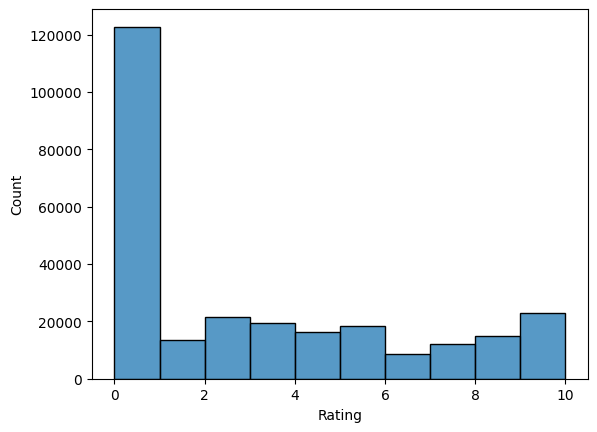

In [158]:
sns.histplot(livros_reviews_df['Rating'], bins=10)

## Remove the books with rating = 0

In [159]:
livros_reviews_df.drop(livros_reviews_df[livros_reviews_df['Rating']==0].index, inplace=True)
livros_reviews_df.shape


(149836, 3)

<AxesSubplot: xlabel='Rating', ylabel='Count'>

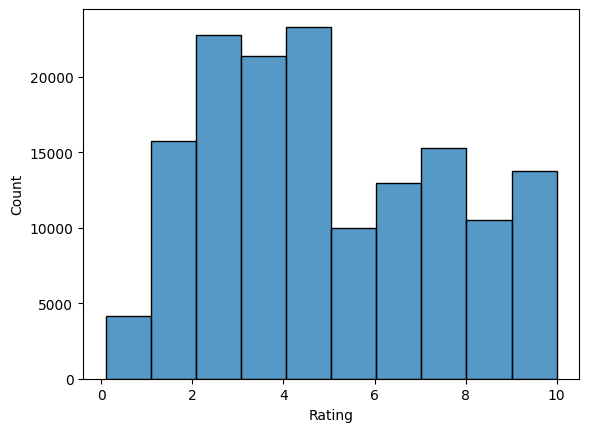

In [212]:
sns.histplot(livros_reviews_df['Rating'], bins=10)

In [161]:
#Merge the two DataFrames into one
livros_ratings_completo_df = pd.merge(livros_df, reviews_df , on='ISBN')
livros_ratings_completo_df.drop(livros_ratings_completo_df[livros_ratings_completo_df['Rating']==0].index, inplace=True)
livros_ratings_completo_df.head()

,ISBN,Title,Author,URL_Cover,User,Rating
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
5,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,67544,8
8,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [213]:
# Calculando quantos ratings cada livro teve (agrupando por título e contando os ratings)
qtdade_reviews = livros_ratings_completo_df.groupby(by = ['ISBN', 'Title'])['Rating'].count().reset_index()

qtdade_reviews = qtdade_reviews.rename(columns = {'Rating': 'qtdade_reviews'})
qtdade_reviews.sort_values('qtdade_reviews', ascending=False).head(20)

,ISBN,Title,qtdade_reviews
91,0316666343,The Lovely Bones: A Novel,707
489,0971880107,Wild Animus,581
199,0385504209,The Da Vinci Code,487
60,0312195516,The Red Tent (Bestselling Backlist),383
13,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,320
393,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,313
53,0142001740,The Secret Life of Bees,307
312,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,295
269,044023722X,A Painted House,281
344,0452282152,Girl with a Pearl Earring,278


In [163]:
qtdade_reviews['qtdade_reviews'].describe()

count    149836.000000
mean          2.561748
std           7.505562
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: qtdade_reviews, dtype: float64

<AxesSubplot: ylabel='qtdade_reviews'>

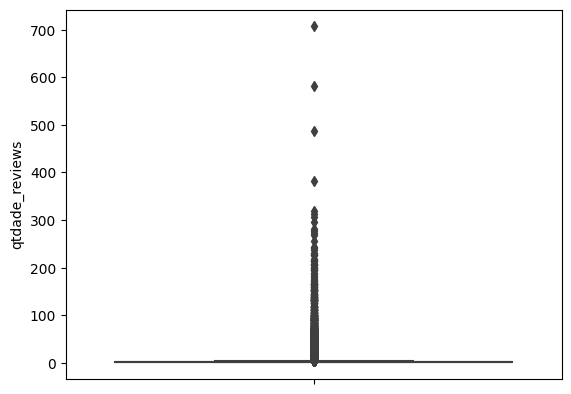

In [164]:
sns.boxplot(data=qtdade_reviews, y=qtdade_reviews['qtdade_reviews'])

In [165]:
qtdade_reviews.drop(qtdade_reviews[qtdade_reviews['qtdade_reviews']<=50].index, inplace=True)
qtdade_reviews['qtdade_reviews'].describe()

count    507.000000
mean      95.394477
std       63.279996
min       51.000000
25%       59.000000
50%       74.000000
75%      104.500000
max      707.000000
Name: qtdade_reviews, dtype: float64

<AxesSubplot: ylabel='qtdade_reviews'>

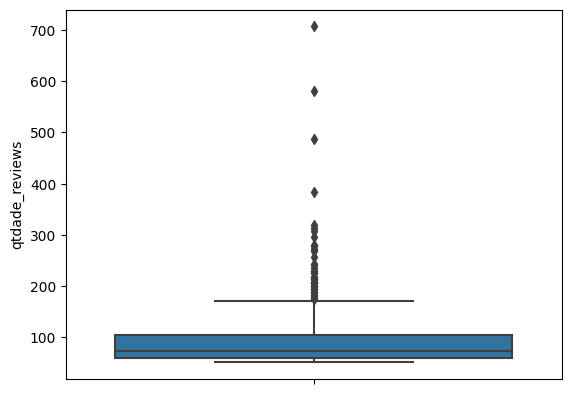

In [166]:
sns.boxplot(data=qtdade_reviews, y=qtdade_reviews['qtdade_reviews'])

In [167]:
# Merge the review count into the 
livros_ratings_completo_df = livros_ratings_completo_df.merge(qtdade_reviews, on = 'ISBN')
livros_ratings_completo_df = livros_ratings_completo_df.drop(['Title_y'], axis=1)
livros_ratings_completo_df = livros_ratings_completo_df.rename(columns={'Title_x': 'Title'})
livros_ratings_completo_df.head()

,ISBN,Title,Author,URL_Cover,User,Rating,qtdade_reviews
0,0440234743,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...,3329,8,169
1,0440234743,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...,7346,9,169
2,0440234743,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...,7352,8,169
3,0440234743,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...,9419,5,169
4,0440234743,The Testament,John Grisham,http://images.amazon.com/images/P/0440234743.0...,11224,6,169


In [168]:
len(livros_ratings_completo_df['Title'].unique())

469

## Pivot the Dataframe

In [169]:
livro_por_usuario = livros_ratings_completo_df.pivot_table(index='Title', columns='User', values='Rating').fillna(0)

livro_por_usuario.head()

User,9,16,26,42,51,91,97,99,114,125,...,278755,278773,278798,278800,278828,278832,278836,278843,278844,278854
Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
#Stores the current dataframe in sparse matrix format
matriz_livro_por_usuario = csr_matrix(livro_por_usuario.values)

In [199]:
#Create the model and fit the data
modelo_recsys = NearestNeighbors(n_neighbors=10 ,metric = 'cosine', algorithm = 'auto')
modelo_recsys.fit(matriz_livro_por_usuario)

NearestNeighbors(metric='cosine', n_neighbors=10)

### Book recommendation system

In [206]:
#Select a book from the database
livro_por_usuario.loc[livro_por_usuario.index.str.contains('Lord'), ].index

Index(['Lord of the Flies',
       'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
       'The Return of the King (The Lord of the Rings, Part 3)',
       'The Two Towers (The Lord of the Rings, Part 2)'],
      dtype='object', name='Title')

In [207]:
book = "The Fellowship of the Ring (The Lord of the Rings, Part 1)"
book_position = livro_por_usuario.index.get_loc(book)
book_position

336

In [215]:
#Determine the number of recommendations
recommendations = 11

distances, indices = modelo_recsys.kneighbors(livro_por_usuario.iloc[book_position,:].values.reshape(1, -1), n_neighbors = recommendations)

print('Recommendations based on {0}\':\n'.format(livro_por_usuario.index[book_position]))

for i in range(1, len(indices.flatten())):
    print('{0}: {1}'.format(i, livro_por_usuario.index[indices.flatten()[i]]))

Recommendations based on The Fellowship of the Ring (The Lord of the Rings, Part 1)':

1: The Return of the King (The Lord of the Rings, Part 3)
2: The Two Towers (The Lord of the Rings, Part 2)
3: The Hobbit : The Enchanting Prelude to The Lord of the Rings
4: The Tale of the Body Thief (Vampire Chronicles (Paperback))
5: Harry Potter and the Chamber of Secrets (Book 2)
6: Harry Potter and the Prisoner of Azkaban (Book 3)
7: Ender's Game (Ender Wiggins Saga (Paperback))
8: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
9: Harry Potter and the Goblet of Fire (Book 4)
10: Harry Potter and the Order of the Phoenix (Book 5)


#### Using the covers


In [216]:
for i in range(0, len(indices.flatten())):
    if i == 0:
        print('Recommendations based on {0}:\n'.format(livro_por_usuario.index[book_position]))
    else:
        # Pegando o título da recomendação
        titulo_recomendacao = livro_por_usuario.index[indices.flatten()[i]]
        
        # Buscando a url da capa a partir do título (não temos mais o isbn, lembra?)
        titulo, url_capa = livros_df.loc[livros_df['Title'] == titulo_recomendacao, ['Title', 'URL_Cover']].values[0]
        
        # Imprimindo o título e usando a função HTML para mostrar a imagem a partir
        # da URL
        print(f'Recomendação {i}: {titulo}')
        display(HTML(f'<img src="{url_capa}">'))

Recommendations based on The Fellowship of the Ring (The Lord of the Rings, Part 1):

Recomendação 1: The Return of the King (The Lord of the Rings, Part 3)


Recomendação 2: The Two Towers (The Lord of the Rings, Part 2)


Recomendação 3: The Hobbit : The Enchanting Prelude to The Lord of the Rings


Recomendação 4: The Tale of the Body Thief (Vampire Chronicles (Paperback))


Recomendação 5: Harry Potter and the Chamber of Secrets (Book 2)


Recomendação 6: Harry Potter and the Prisoner of Azkaban (Book 3)


Recomendação 7: Ender's Game (Ender Wiggins Saga (Paperback))


Recomendação 8: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


Recomendação 9: Harry Potter and the Goblet of Fire (Book 4)


Recomendação 10: Harry Potter and the Order of the Phoenix (Book 5)
